In [6]:
from EIT_CEM_app import *
%matplotlib inline

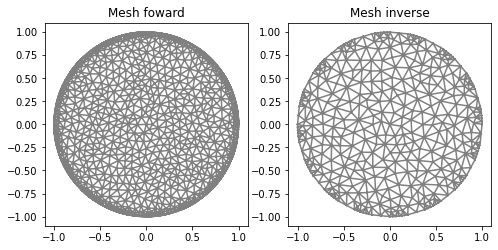

In [12]:
"Mesh"
ele_pos=electrodes_position(L=16, per_cober=0.5, rotate=0) 
mesh_inverse=MyMesh(r=1, n=10, n_in=7, n_out=0, electrodes_obj=ele_pos)
mesh_forward=MyMesh(r=1, n=15, n_in=25, n_out=10, electrodes_obj=ele_pos)

"Plot"
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_forward, title="Mesh forward");
plt.subplot(1,2,2)
plot(mesh_inverse, title="Mesh inverse");

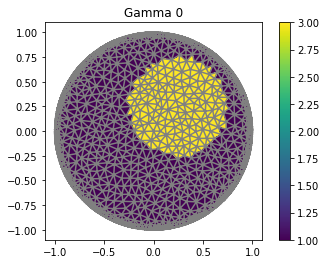

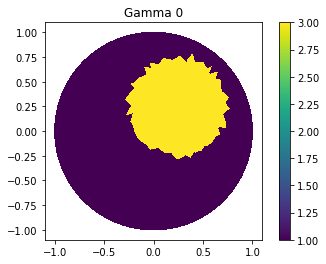

In [13]:
ValuesCells0=GammaCircle(mesh_forward,3.0,1.0,0.50, 0.25, 0.25);
gamma0=CellFunction(mesh_forward, values=ValuesCells0);          


"Plot"
V_DG=FiniteElement('DG',mesh_forward.ufl_cell(),0)
Q=FunctionSpace(mesh_forward,V_DG)
gamma0_func=interpolate(gamma0, Q)
p=plot(gamma0_func, title="Gamma 0")
plot(mesh_forward)
plt.colorbar(p)

"Plot"
V_DG=FiniteElement('DG',mesh_forward.ufl_cell(),0)
plot_figure(mesh_forward, V_DG, gamma0, name="Gamma 0", map="viridis");

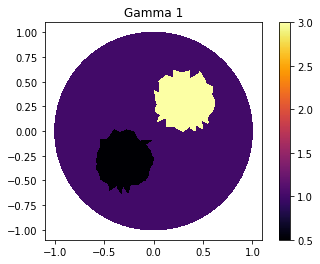

In [14]:
ValuesCells0=GammaCircle(mesh_forward,2.5,0.5,0.30, 0.30, 0.30);
ValuesCells1=GammaCircle(mesh_forward,0.0,0.5,0.30, -0.30, -0.30);
gamma1=CellFunction(mesh_forward, values=ValuesCells0+ValuesCells1);          

plot_figure(mesh_forward, V_DG, gamma1, name="Gamma 1", map="inferno");

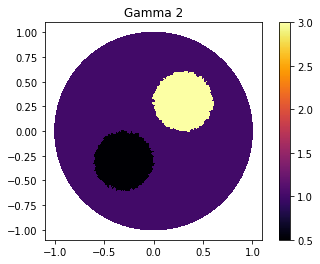

In [17]:
mesh_forward2=MyMesh(r=1, n=50, n_in=25, n_out=10, electrodes_obj=ele_pos)

ValuesCells0=GammaCircle(mesh_forward2,2.5,0.5,0.30, 0.30, 0.30);
ValuesCells1=GammaCircle(mesh_forward2,0.0,0.5,0.30, -0.30, -0.30);
gamma2=CellFunction(mesh_forward2, values=ValuesCells0+ValuesCells1);          

V_DG=FiniteElement('DG',mesh_forward2.ufl_cell(),0)
plot_figure(mesh_forward2, V_DG, gamma2, name="Gamma 2", map="inferno");


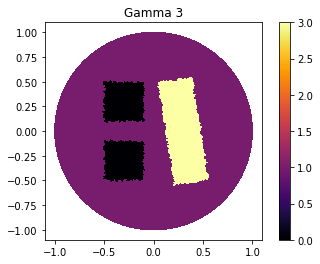

In [18]:
def GammaQuad(mesh, in_v, out_v, radius,centerx, centery, angle=0, a=1, b=1):
    ValuesGamma=np.zeros(mesh.num_cells())
    centerx_new = centerx*cos(angle)-centery*sin(angle)
    centery_new = centery*cos(angle)+centerx*sin(angle)
    centerx, centery=centerx_new, centery_new
    
    for i in range(0, mesh.num_cells()):
        cell = Cell(mesh, i)
        
        vertices=np.array(cell.get_vertex_coordinates())
        x=(vertices[0]+vertices[2]+vertices[4])/3           
        y=(vertices[1]+vertices[3]+vertices[5])/3
        
        "rotation"
        x_new=x*cos(angle)-y*sin(angle)
        y_new=y*cos(angle)+x*sin(angle)
        x,y=x_new,y_new
        

        
        if (1/a*abs(x-centerx)>=radius) or 1/b*abs(y-centery)>=radius:
            ValuesGamma[i]=out_v
        else:
            ValuesGamma[i]=in_v
    
    return ValuesGamma


ValuesCells1=GammaQuad(mesh_forward2, 3.0, 1.0, 0.35, 0.3, 0.0, pi/2*0.9, 1.5, 0.5);
ValuesCells2=GammaQuad(mesh_forward2,-1.0, 0.0, 0.2, -0.30, -0.30);
ValuesCells3=GammaQuad(mesh_forward2,-1.0, 0.0, 0.2, -0.30, 0.30);
gamma3=CellFunction(mesh_forward2, values=ValuesCells1+ValuesCells2+ValuesCells3);          

V_DG=FiniteElement('DG',mesh_forward2.ufl_cell(),0)
plot_figure(mesh_forward2, V_DG, gamma3, name="Gamma 3", map="inferno");

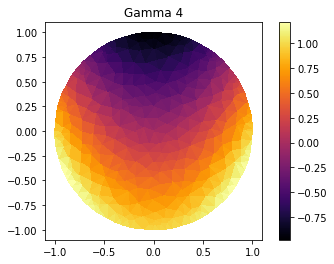

In [19]:
def evalinElement(mesh, u, cell_number):
    cell = Cell(mesh, cell_number)
    vertices=np.array(cell.get_vertex_coordinates())
    x=(vertices[0]+vertices[2]+vertices[4])/3           
    y=(vertices[1]+vertices[3]+vertices[5])/3
   
    result=u(x,y)   
    return result

func=Expression("pow(x[0],2)-x[1]", degree=2)

mesh=mesh_inverse
ValuesCells4=np.zeros(mesh.num_cells())
for cell_index in range(mesh.num_cells()):
    ValuesCells4[cell_index]=evalinElement(mesh, func, cell_index)
    
gamma4=CellFunction(mesh, values=ValuesCells4);          

V_DG=FiniteElement('DG',mesh.ufl_cell(),0)
plot_figure(mesh, V_DG, gamma4, name="Gamma 4", map="inferno");


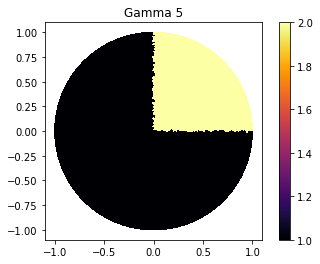

In [21]:
func2=Expression("x[1]>= 0 & x[0]>=0 ? 2 : 1 ", degree=2)

mesh=mesh_forward2
ValuesCells5=np.zeros(mesh.num_cells())
for cell_index in range(mesh.num_cells()):
    ValuesCells5[cell_index]=evalinElement(mesh, func2, cell_index)
    
gamma5=CellFunction(mesh, values=ValuesCells5);          

V_DG=FiniteElement('DG',mesh.ufl_cell(),0)
plot_figure(mesh, V_DG, gamma5, name="Gamma 5", map="inferno");


